# EDA de esqueletos

## Exploratory Data Analysis del dataset UCF101 Skeleton (2D)

Este notebook explora el archivo ucf101_2d.pkl, proporcionado como anotaciones 2D para el dataset UCF101.

Documentación y descarga de anotaciones:
https://mmaction2.readthedocs.io/en/latest/dataset_zoo/skeleton.html



In [22]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint



### Cargar un archivo pkl

In [10]:
import pickle
import numpy as np

path = "../data/raw/ucf101_2d.pkl"

with open(path, "rb") as f:
    data = pickle.load(f)

type(data), data.keys()


(dict, dict_keys(['split', 'annotations']))

### Inspeccionar split

In [11]:
data["split"].keys()

dict_keys(['train1', 'train2', 'train3', 'test1', 'test2', 'test3'])

In [12]:
for split_name, video_list in data["split"].items():
    print(split_name, len(video_list))

train1 9537
train2 9586
train3 9624
test1 3783
test2 3734
test3 3696


### Explorar annotations en detalle

In [16]:
len(data["annotations"])

13320

In [17]:
sample = data["annotations"][0]
sample

{'keypoint': array([[[[208.9 ,  92.5 ],
          [220.4 ,  81.  ],
          [180.  ,  81.  ],
          ...,
          [ 88.  , 207.6 ],
          [128.2 , 144.4 ],
          [134.  , 141.5 ]],
 
         [[211.5 ,  93.4 ],
          [220.1 ,  81.8 ],
          [179.6 ,  78.94],
          ...,
          [ 87.2 , 206.1 ],
          [130.5 , 145.4 ],
          [133.4 , 142.5 ]],
 
         [[208.9 ,  93.7 ],
          [220.8 ,  81.8 ],
          [179.  ,  78.8 ],
          ...,
          [ 89.56, 207.  ],
          [140.2 , 141.4 ],
          [137.2 , 141.4 ]],
 
         ...,
 
         [[196.8 , 100.06],
          [212.  ,  87.9 ],
          [169.4 ,  87.9 ],
          ...,
          [267.  , 191.5 ],
          [145.  , 176.2 ],
          [145.  , 170.1 ]],
 
         [[198.5 , 100.06],
          [210.5 ,  88.06],
          [168.5 ,  85.06],
          ...,
          [264.2 , 192.9 ],
          [258.2 , 201.9 ],
          [147.5 , 168.9 ]],
 
         [[198.2 , 100.8 ],
          [210

### Imprimir shapes clave

In [18]:
kp = sample["keypoint"]
ks = sample["keypoint_score"]

print("Keypoint shape:", kp.shape)          # (M, T, V, C)
print("Score shape:", ks.shape)             # (M, T, V)

M, T, V, C = kp.shape
print(f"M={M} personas, T={T} frames, V={V} keypoints, C={C} coords")


Keypoint shape: (1, 119, 17, 2)
Score shape: (1, 119, 17)
M=1 personas, T=119 frames, V=17 keypoints, C=2 coords


### Visualizar 1 frame y sus keypoints

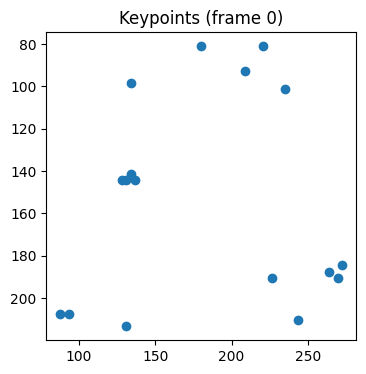

In [19]:
import matplotlib.pyplot as plt

frame_idx = 0
person_idx = 0

xy = kp[person_idx, frame_idx]  # (17,2)
x = xy[:,0]
y = xy[:,1]

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.title("Keypoints (frame 0)")
plt.gca().invert_yaxis()  # porque imagenes usualmente y va hacia abajo
plt.show()


### Distribución de clases (opcional)

In [20]:
labels = [ann['label'] for ann in data['annotations']]
np.unique(labels, return_counts=True)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([145, 114, 145, 132, 108, 155, 150, 134, 131, 160, 134, 150, 131,
        109, 112, 155, 163, 134, 101, 131, 112, 138, 139, 167, 110, 150,
        161, 111, 126, 125, 126, 137, 139, 130, 140, 150, 128, 111, 147,
        123, 124, 164, 125, 158, 117, 121, 123, 144, 141, 123, 131, 127,
        125, 136, 110, 132, 114, 113, 164, 151, 164, 155, 160, 105, 157,
        111, 100, 149, 123, 100, 160, 102, 111, 144, 119, 137, 1